# Create the Reference Auto Encoder with same architecture as ClaDec but optimized for reconstruction only

In [1]:
import os, pathlib

file_path = os.path.dirname(os.path.realpath("__file__"))
home_dir = pathlib.Path(file_path).parent.parent.parent
os.chdir(home_dir)

In [2]:
import tensorflow as tf

from tensorflow import keras
import matplotlib.pyplot as plt

from src.common import get_optimizer
from src.fashion_mnist.data import get_fashion_mnist_train_test, get_fashion_mnist_labels_categorical
from src.fashion_mnist.file_names import SAVED_REFAE_PATH
from src.models import get_rafae

tf.random.set_seed(1234)

train_images, test_images = get_fashion_mnist_train_test()
train_labels_c, test_labels_c = get_fashion_mnist_labels_categorical()

## Auto Encoder with the 128 neuron Dense layer as code

In [3]:
model = get_rafae(add_dense=True)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       256   

2022-06-03 01:28:01.765615: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-03 01:28:01.796803: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-03 01:28:01.797107: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-03 01:28:01.797882: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [4]:
optimizer = get_optimizer(learning_rate=0.00075)
mse = keras.losses.MeanSquaredError()
model.compile(optimizer, loss=mse)

In [6]:
history = model.fit(train_images, train_images, epochs=10)

Epoch 1/4
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0111
Epoch 2/4
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0108
Epoch 3/4
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0105
Epoch 4/4
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0103


In [7]:
model.evaluate(test_images, test_images)

313/313 [==============================] - 2s 5ms/step - loss: 0.0090


0.00900039542466402

In [8]:
model_path = SAVED_REFAE_PATH.joinpath('dense')
model.save(model_path)

2022-06-03 01:31:23.401993: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /home/tom/Uni_Dev/cladec-mnist/saved-models/fashion_mnist/refae/dense/assets


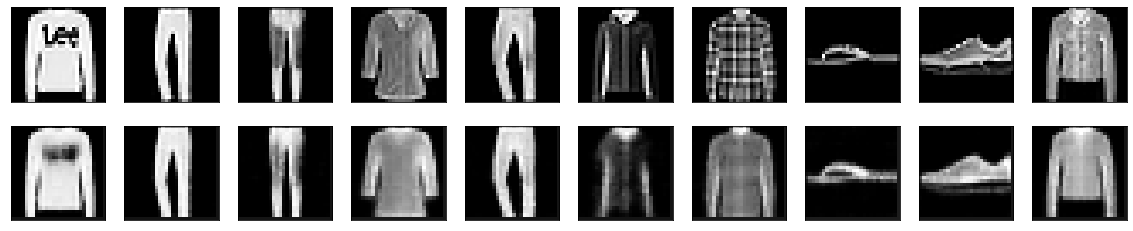

In [9]:
# https://blog.keras.io/building-autoencoders-in-keras.html
decoded_imgs = model.predict(test_images)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## ## Auto Encoder with last conv layer as code

In [10]:
model = get_rafae(add_dense=False)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2_input (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 64)       256 

In [11]:
optimizer = get_optimizer(learning_rate=0.00075)
mse = keras.losses.MeanSquaredError()
model.compile(optimizer, loss=mse)
history = model.fit(train_images, train_images, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0083
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0036
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0030
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0026
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0024
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0023
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0021
Epoch 8/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0021
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0020
Epoch 10/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0019


In [12]:
model.evaluate(test_images, test_images)

313/313 [==============================] - 2s 4ms/step - loss: 0.0019


0.0018777601653710008

In [13]:
model_path = SAVED_REFAE_PATH.joinpath('conv')
model.save(model_path)

INFO:tensorflow:Assets written to: /home/tom/Uni_Dev/cladec-mnist/saved-models/fashion_mnist/refae/conv/assets


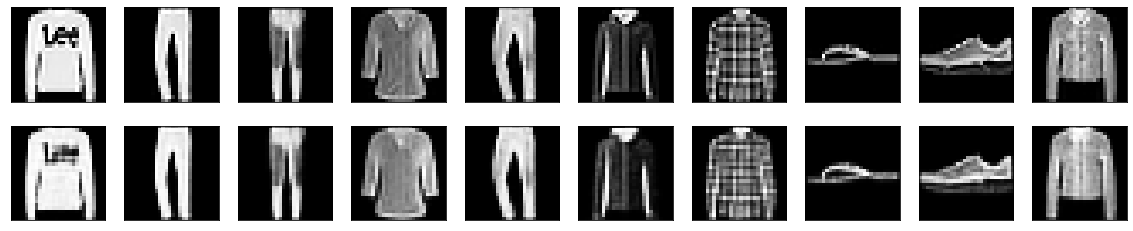

In [14]:
# https://blog.keras.io/building-autoencoders-in-keras.html
decoded_imgs = model.predict(test_images)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()